In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import cv2
import os
import matplotlib.pyplot as plt
import h5py
import pickle as pk

### Data Exploration

#### OCID

In [ ]:
ocid_rgb_dataset_path = '../ocid/ARID10_crops/squared_rgb/'
ocid_depth_dataset_path = '../ocid/ARID10_crops/surfnorm++/'

In [ ]:
ocid_trial_img_name = 'apple/apple_1/04_ARID10tablebottomcurvedseq18_apple_1_4.png'

ocid_rgb_img = cv2.cvtColor(cv2.imread(os.path.join(ocid_rgb_dataset_path, ocid_trial_img_name)), cv2.COLOR_BGR2RGB)
ocid_depth_img = cv2.imread(os.path.join(ocid_depth_dataset_path, ocid_trial_img_name))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(ocid_rgb_img)
plt.title('RGB Image')
plt.subplot(1, 2, 2)
plt.imshow(ocid_depth_img)
plt.title('Depth Image')
plt.show()

In [ ]:
ocid_depth_img.min(), ocid_depth_img.max()

### NYU Depth v2 Dataset

In [ ]:
nyu_dataset_path = '../NYUDepth_v2/nyu_depth_v2_labeled.mat'
nyu_labeled_dataset = h5py.File(nyu_dataset_path, 'r')
nyu_depth_v2_labeled_data = {}


# 1 accelData
print("Processing accelData:", end=' ')
accelData = nyu_labeled_dataset['accelData'][:]
nyu_depth_v2_labeled_data['accelData'] = accelData.T 
print(accelData.T.shape)                    # (1449, 4)


# 2 depths
print("Processing depths:", end=' ')
depths = nyu_labeled_dataset['depths'][:]
nyu_depth_v2_labeled_data['depths'] = np.moveaxis(depths, 1, 2)
print(np.moveaxis(depths, 1, 2).shape)      # (1449, 480, 640)


# 3 images
print("Processing images:", end=' ')
images= nyu_labeled_dataset['images'][:]
nyu_depth_v2_labeled_data['images'] = np.moveaxis(images, 2, 3)
print(np.moveaxis(images, 2, 3).shape)      # (1449, 3, 480, 640)


# 4 instances
print("Processing instances:", end=' ')
instances = nyu_labeled_dataset['instances'][:]
nyu_depth_v2_labeled_data['instances'] = np.moveaxis(instances, 1, 2)
print(np.moveaxis(instances, 1, 2).shape)   # (1449, 480, 640)


# 5 labels
print("Processing labels:", end=' ')
labels = nyu_labeled_dataset['labels'][:]
nyu_depth_v2_labeled_data['labels'] = np.moveaxis(labels, 1, 2)
print(np.moveaxis(labels, 1, 2).shape)      # (1449, 480, 640)


# 6 names
print("Processing names:", end=' ')
names = nyu_labeled_dataset['names'][:]
names_list = []
for i in range(names.shape[1]):
    name = ''.join(chr(j[0]) for j in nyu_labeled_dataset[names[0][i]])
    names_list.append(name)
nyu_depth_v2_labeled_data['names'] = names_list
print(len(names_list))


# 7 namesToIds
# print("Processing namesToIds:", end=' ')
# namesToIds_dict = {}
# names2ids = pd.read_csv('names2ids.csv', header=None)
# for k, v in zip(names2ids.iloc[:][0], names2ids.iloc[:][1]):
#     namesToIds_dict[k.strip('\'')] = v
# nyu_depth_v2_labeled_data['namesToIds'] = namesToIds_dict
# print(len(namesToIds_dict))


# 8 rawDepths
print("Processing rawDepths:", end=' ')
rawDepths = nyu_labeled_dataset['rawDepths'][:]
nyu_depth_v2_labeled_data['rawDepths'] = np.moveaxis(rawDepths, 1, 2)
print(np.moveaxis(rawDepths, 1, 2).shape)   # (1449, 480, 640)


# 9 rawDepthFilenames
print("Processing rawDepthFilenames:", end=' ')
rawDepthFilenames = nyu_labeled_dataset['rawDepthFilenames'][:]
rawDepthFilenames_list = []
for i in range(rawDepthFilenames.shape[1]):
    rawDepthFilename = ''.join(chr(j[0]) for j in nyu_labeled_dataset[rawDepthFilenames[0][i]])
    rawDepthFilenames_list.append(rawDepthFilename)
nyu_depth_v2_labeled_data['rawDepthFilenames'] = rawDepthFilenames_list
print(len(rawDepthFilenames_list))


# 10 rawRgbFilenames
print("Processing rawRgbFilenames:", end=' ')
rawRgbFilenames = nyu_labeled_dataset['rawRgbFilenames'][:]
rawRgbFilenames_list = []
for i in range(rawRgbFilenames.shape[1]):
    rawRgbFilename = ''.join(chr(j[0]) for j in nyu_labeled_dataset[rawRgbFilenames[0][i]])
    rawRgbFilenames_list.append(rawRgbFilename)
nyu_depth_v2_labeled_data['rawRgbFilenames'] = rawRgbFilenames_list
print(len(rawRgbFilenames_list))


# 11 scenes
print("Processing scenes:", end=' ')
scenes = nyu_labeled_dataset['scenes'][:]
scenes_list = []
for i in range(scenes.shape[1]):
    scene = ''.join(chr(j[0]) for j in nyu_labeled_dataset[scenes[0][i]])
    scenes_list.append(scene)
nyu_depth_v2_labeled_data['scenes'] = scenes_list
print(len(scenes_list))


# 12 sceneTypes
sceneTypes = nyu_labeled_dataset['sceneTypes'][:]
print("Processing sceneTypes:", end=' ')
sceneTypes_list = []
for i in range(sceneTypes.shape[1]):
    sceneType = ''.join(chr(j[0]) for j in nyu_labeled_dataset[sceneTypes[0][i]])
    sceneTypes_list.append(sceneType)
nyu_depth_v2_labeled_data['sceneTypes'] = sceneTypes_list
print(len(sceneTypes_list))

with open('nyu_depth_v2_labeled_data.pkl', 'wb') as f:
    pk.dump(nyu_depth_v2_labeled_data, f)

print("Data processing completed!")

In [2]:
nyu_processed_data_path = 'nyu_depth_v2_labeled_data.pkl'
with open(nyu_processed_data_path, 'rb') as f:
    nyu_depth_v2_labeled_data = pk.load(f)

nyu_depth_v2_labeled_data.keys()

dict_keys(['accelData', 'depths', 'images', 'instances', 'labels', 'names', 'rawDepths', 'rawDepthFilenames', 'rawRgbFilenames', 'scenes', 'sceneTypes'])

(640, 480, 3, 1449) (640, 480, 1449) (640, 480, 1449)


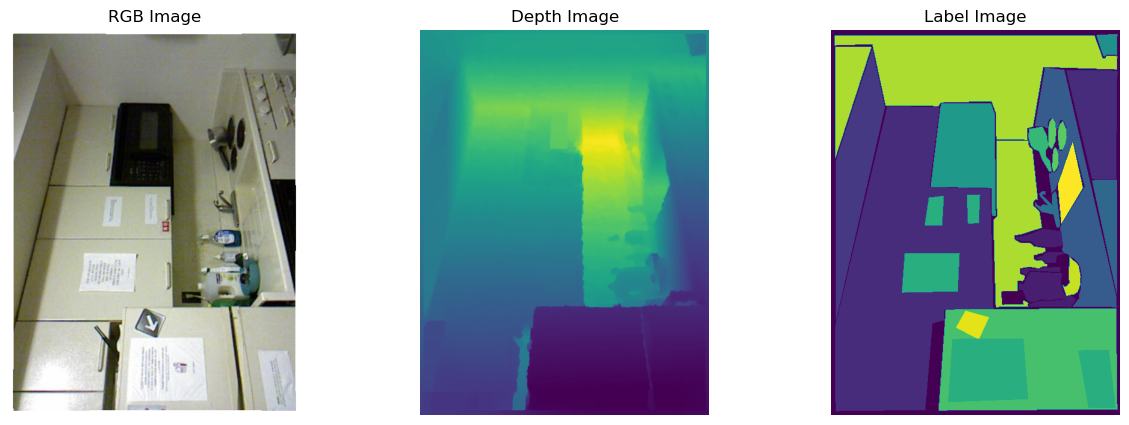

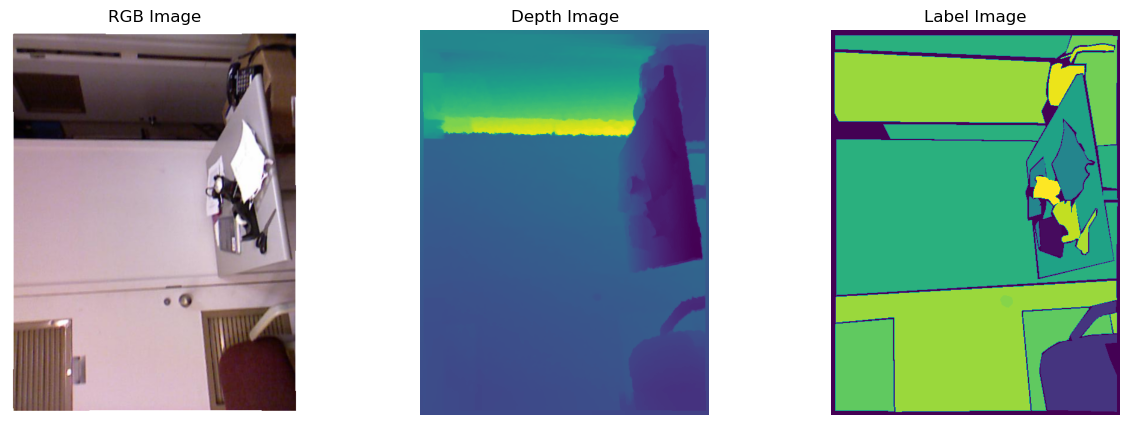

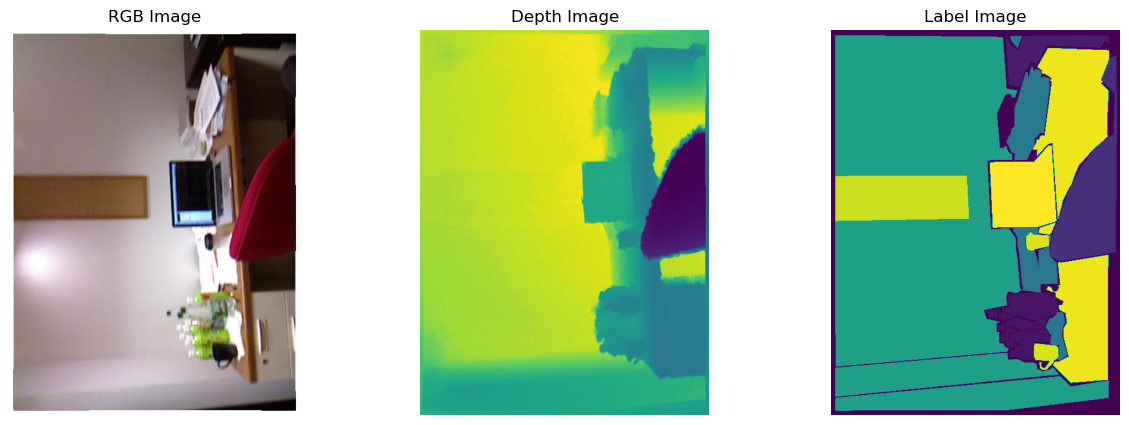

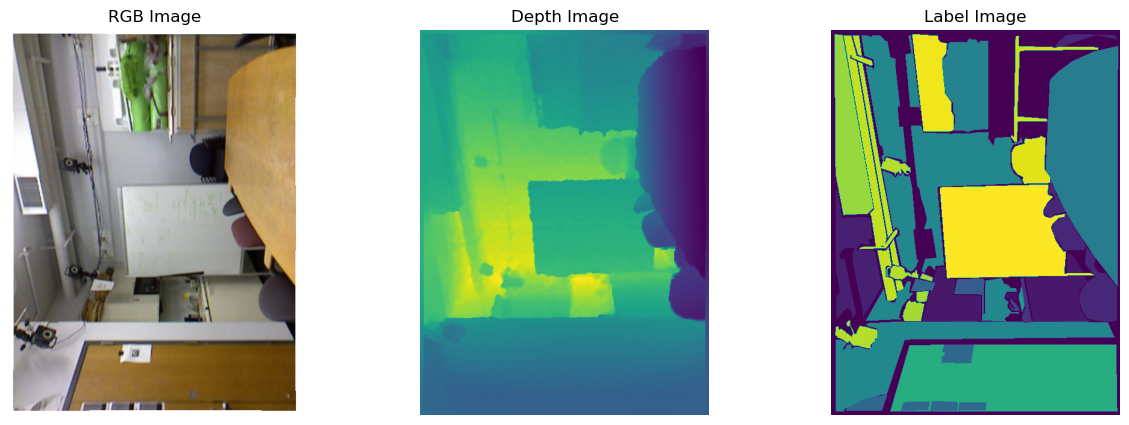

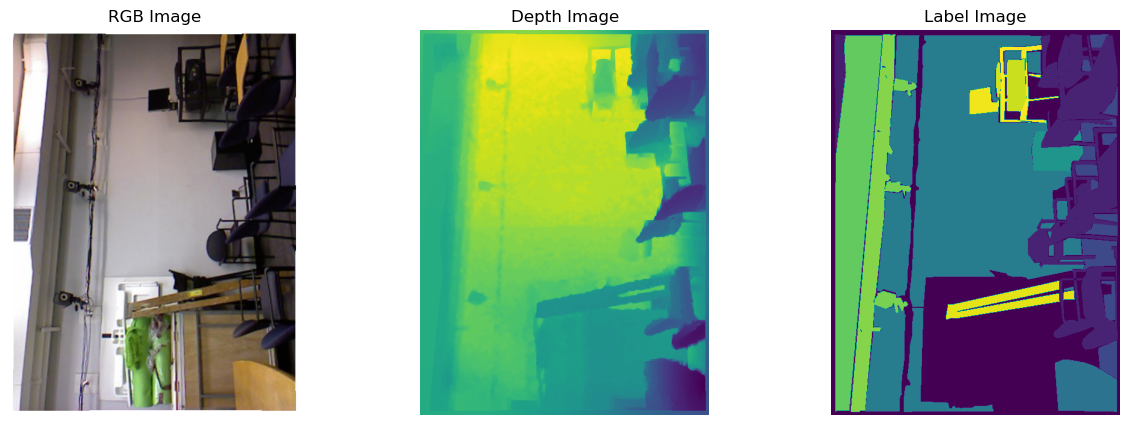

In [3]:
print(nyu_depth_v2_labeled_data['images'].T.shape, nyu_depth_v2_labeled_data['depths'].T.shape, nyu_depth_v2_labeled_data['labels'].T.shape)
i = 0
while i < 5:
    i += 1
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(nyu_depth_v2_labeled_data['images'][i].T)
    plt.axis('off')
    plt.title('RGB Image')
    plt.subplot(1, 3, 2)
    plt.imshow(nyu_depth_v2_labeled_data['depths'][i].T)
    plt.axis('off')
    plt.title('Depth Image')
    plt.subplot(1, 3, 3)
    plt.imshow(nyu_depth_v2_labeled_data['labels'][i].T)
    plt.axis('off')
    plt.title('Label Image')
plt.show()

In [4]:
nyu_depth_v2_labeled_data['labels'][3].max(), nyu_depth_v2_labeled_data['labels'][3].min()

(37, 0)

#### Testing

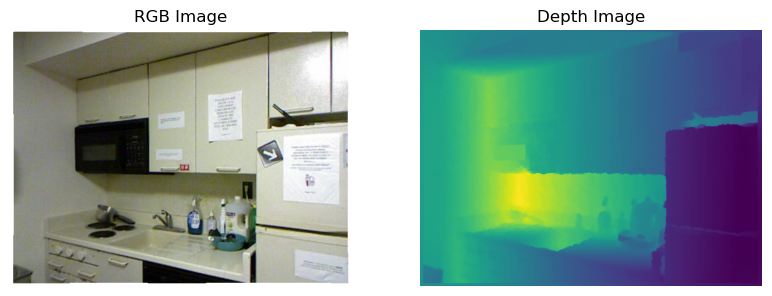

In [37]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(nyu_depth_v2_labeled_data['images'][1].transpose(1, 2, 0))
plt.axis('off')
plt.title('RGB Image')
plt.subplot(1, 3, 2)
plt.imshow(nyu_depth_v2_labeled_data['depths'][1])
plt.axis('off')
plt.title('Depth Image')
plt.show()

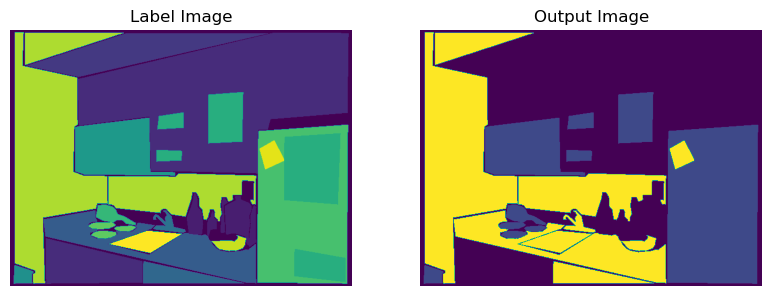

In [53]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(nyu_depth_v2_labeled_data['labels'][1])
plt.axis('off')
plt.title('Label Image')

test = nyu_depth_v2_labeled_data['labels'][1].copy()
test[(test >= 0) & (test <= 4)] = 1
test[(test >= 7 ) & (test <= 9)] = 50
test[(test >= 12) & (test <= 18)] = 3
test[test >= 21] = 10
plt.subplot(1, 3, 2)
plt.imshow(test)
plt.axis('off')
plt.title('Output Image')
plt.show()

#### Trial Image Extraction

In [ ]:
output_file_name = 'trial_img.npy'
trial_img = {
    'rgb': nyu_depth_v2_labeled_data['images'][0].T,
    'depth': nyu_depth_v2_labeled_data['depths'][0].T,
    'label': nyu_depth_v2_labeled_data['labels'][0].T
}
np.save(output_file_name, trial_img)

In [ ]:
img = np.load(output_file_name, allow_pickle=True)

In [ ]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img.item()['rgb'])
plt.subplot(1, 3, 2)
plt.imshow(img.item()['depth'])
plt.subplot(1, 3, 3)
plt.imshow(img.item()['label'])

### Trial

In [3]:
nyu_processed_data_path = 'nyu_depth_v2_labeled_data.pkl'
with open(nyu_processed_data_path, 'rb') as f:
    nyu_depth_labeled_data = pk.load(f)

nyu_depth_labeled_data.keys()

dict_keys(['accelData', 'depths', 'images', 'instances', 'labels', 'names', 'rawDepths', 'rawDepthFilenames', 'rawRgbFilenames', 'scenes', 'sceneTypes'])

In [6]:
dataset = {
    'rgb': nyu_depth_labeled_data['images'],
    'depth': nyu_depth_labeled_data['depths'],
    'label': nyu_depth_labeled_data['labels']
}

dataset.keys()

# create a dataloader
class NYUDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.rgb = dataset['rgb']
        self.depth = dataset['depth']
        self.label = dataset['label']
    
    def __len__(self):
        return len(self.rgb)
    
    def __getitem__(self, idx):
        return self.rgb[idx], self.depth[idx], self.label[idx]
    
nyu_dataset = NYUDataset(dataset)
nyu_dataloader = torch.utils.data.DataLoader(nyu_dataset, batch_size=4, shuffle=True)

In [15]:
nyu_dataloader.dataset.label.dtype

dtype('uint16')